In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv("maindata.csv")#,header=1, engine='openpyxl')

In [12]:
df_for_classifier = df[['Age', 'Gender', 'Ht', 'Weight', 'BMI', 'HoarseVoice',
       'DiffSwal', 'PainSwal', 'Otalgia', 'UnilatNO', 'NeckLump', 'ThroatLump',
       'FOSIT', 'SoreThroat',"Diagnostic group"]]
df_for_classifier.head()

,Age,Gender,Ht,Weight,BMI,HoarseVoice,DiffSwal,PainSwal,Otalgia,UnilatNO,NeckLump,ThroatLump,FOSIT,SoreThroat,Diagnostic group
0,9.130732,M,1.41,28.95,14.561642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Non-cancer
1,32.465435,M,1.67,52.50,18.824626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Non-cancer
2,67.312799,M,1.78,60.50,19.094811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Non-cancer
3,59.466119,M,1.87,67.50,19.302811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Non-cancer
4,68.991102,M,1.70,56.80,19.653979,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-cancer


In [13]:
df_for_classifier['Gender'] = df_for_classifier['Gender'].map({'M': 1, 'F': 0})
df_for_classifier['Diagnostic group'] = df_for_classifier['Diagnostic group'].map({'Cancer': 1, 'Non-cancer': 0})
df_for_classifier.head()

/tmp/ipykernel_21536/3131253531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_classifier['Gender'] = df_for_classifier['Gender'].map({'M': 1, 'F': 0})
/tmp/ipykernel_21536/3131253531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_classifier['Diagnostic group'] = df_for_classifier['Diagnostic group'].map({'Cancer': 1, 'Non-cancer': 0})


,Age,Gender,Ht,Weight,BMI,HoarseVoice,DiffSwal,PainSwal,Otalgia,UnilatNO,NeckLump,ThroatLump,FOSIT,SoreThroat,Diagnostic group
0,9.130732,1,1.41,28.95,14.561642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,32.465435,1,1.67,52.50,18.824626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,67.312799,1,1.78,60.50,19.094811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,59.466119,1,1.87,67.50,19.302811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,68.991102,1,1.70,56.80,19.653979,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df_for_classifier['Age'] = scaler.fit_transform(df_for_classifier[['Age']])
df_for_classifier['Ht'] = scaler.fit_transform(df_for_classifier[['Ht']])
df_for_classifier['Weight'] = scaler.fit_transform(df_for_classifier[['Weight']])
df_for_classifier.head()


/tmp/ipykernel_21536/147852631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_classifier['Age'] = scaler.fit_transform(df_for_classifier[['Age']])
/tmp/ipykernel_21536/147852631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_classifier['Ht'] = scaler.fit_transform(df_for_classifier[['Ht']])
/tmp/ipykernel_21536/147852631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Age,Gender,Ht,Weight,BMI,HoarseVoice,DiffSwal,PainSwal,Otalgia,UnilatNO,NeckLump,ThroatLump,FOSIT,SoreThroat,Diagnostic group
0,0.000000,1,0.000000,0.000000,14.561642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.286074,1,0.472727,0.211876,18.824626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.713288,1,0.672727,0.283851,19.094811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.617091,1,0.836364,0.346829,19.302811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.733864,1,0.527273,0.250562,19.653979,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_for_classifier.columns

Index(['Age', 'Gender', 'Ht', 'Weight', 'BMI', 'HoarseVoice', 'DiffSwal',
       'PainSwal', 'Otalgia', 'UnilatNO', 'NeckLump', 'ThroatLump', 'FOSIT',
       'SoreThroat', 'Diagnostic group'],
      dtype='object')

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None
# Fill NaNs with 0
df_for_classifier.fillna(0, inplace=True)

# Define features and target variable
X = df_for_classifier[['Age', 'Gender', 'Ht', 'Weight', 'BMI', 'HoarseVoice', 'DiffSwal',
       'PainSwal', 'Otalgia', 'UnilatNO', 'NeckLump', 'ThroatLump', 'FOSIT',
       'SoreThroat']]
y = df_for_classifier['Diagnostic group']

# Initialize StratifiedKFold
log_reg = LogisticRegression(class_weight={0:1,1:1000}, max_iter=10000)
skf = StratifiedKFold(n_splits=10)

# List to store confusion matrices for each fold
conf_matrices = []


conf_matrices = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    
    # Compute the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Normalize the confusion matrix so that all elements sum to 100%
    conf_matrix_normalized = conf_matrix / conf_matrix.sum() * 100
    conf_matrices.append(conf_matrix_normalized)

# Convert list of confusion matrices to a numpy array
conf_matrices = np.array(conf_matrices)

# Calculate the mean confusion matrix
mean_conf_matrix = np.mean(conf_matrices, axis=0)

# Calculate the standard deviation of the confusion matrices
std_dev_conf_matrix = np.std(conf_matrices, axis=0)

# Round the mean and standard deviation confusion matrices to 1 decimal place
mean_conf_matrix_rounded = np.round(mean_conf_matrix, 1)
std_dev_conf_matrix_rounded = np.round(std_dev_conf_matrix, 1)

# Print the rounded mean confusion matrix
print("Mean Confusion Matrix (Percentages, Rounded to 1 dp):")
print(mean_conf_matrix_rounded)

# Print the rounded standard deviation of the confusion matrices
print("Standard Deviation of Confusion Matrices (Percentages, Rounded to 1 dp):")
print(std_dev_conf_matrix_rounded)

# Optionally, print the classification report for the overall predictions
y_pred = cross_val_predict(log_reg, X, y, cv=10)
class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

Mean Confusion Matrix (Percentages, Rounded to 1 dp):
[[41.7 53.9]
 [ 1.8  2.6]]
Standard Deviation of Confusion Matrices (Percentages, Rounded to 1 dp):
[[17.8 17. ]
 [ 1.8  1.7]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.43      0.60       260
         1.0       0.05      0.58      0.08        12

    accuracy                           0.44       272
   macro avg       0.50      0.51      0.34       272
weighted avg       0.92      0.44      0.58       272



/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jonny/anaconda3/lib/python3.12/site-packages/sklearn/linear_mode

Confusion Matrix (Percentages, Rounded to 1 dp):
[[63.6 32. ]
 [ 2.2  2.2]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79       260
         1.0       0.06      0.50      0.11        12

    accuracy                           0.66       272
   macro avg       0.52      0.58      0.45       272
weighted avg       0.93      0.66      0.76       272



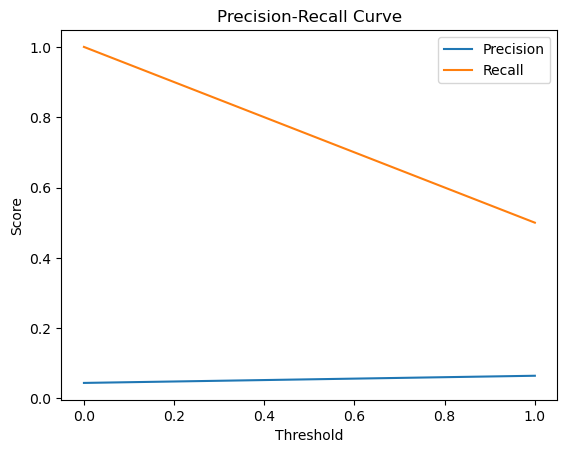

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Fill NaNs with 0
df_for_classifier.fillna(0, inplace=True)

# Define features and target variable
X = df_for_classifier[['Age', 'Gender', 'Ht', 'Weight', 'BMI', 'HoarseVoice', 'DiffSwal',
       'PainSwal', 'Otalgia', 'UnilatNO', 'NeckLump', 'ThroatLump', 'FOSIT',
       'SoreThroat']]
y = df_for_classifier['Diagnostic group']

# Initialize the logistic regression model with class weights and increased max_iter
log_reg = LogisticRegression(class_weight="balanced" , max_iter=1000, penalty='elasticnet',solver = 'saga',l1_ratio=0.15)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# List to store normalized confusion matrices for each fold
conf_matrices = []

# List to store predictions and true labels for all folds
all_y_true = []
all_y_pred_proba = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_proba = log_reg.predict(X_test)#[:, 1]
    
    # Store predictions and true labels
    all_y_true.extend(y_test)
    all_y_pred_proba.extend(y_pred_proba)

# Convert lists to numpy arrays
all_y_true = np.array(all_y_true)
all_y_pred_proba = np.array(all_y_pred_proba)

# Adjust the decision threshold
threshold = 0.12  # Adjust this value to lower false negatives
y_pred_adjusted = (all_y_pred_proba >= threshold).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_y_true, y_pred_adjusted)

# Normalize the confusion matrix so that all elements sum to 100%
conf_matrix_normalized = conf_matrix / conf_matrix.sum() * 100

# Print the normalized confusion matrix
print("Confusion Matrix (Percentages, Rounded to 1 dp):")
print(np.round(conf_matrix_normalized, 1))

# Print the classification report
class_report = classification_report(all_y_true, y_pred_adjusted)
print("Classification Report:")
print(class_report)

# Optionally, plot the precision-recall curve to choose the best threshold
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(all_y_true, all_y_pred_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()